In [5]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt 

In [2]:
file = "combined.csv"
df = pd.read_csv(file, index_col=0)

make histograms for different wavelengths / bands of wavelengths 

showing distribution of the 3 classes at different values of attenuation

choose the wavelengths with the least overlap / greatest contrast between classes

(is there a way to measure this analytically?)

could prioritise contrast between 2 classes over others 

e.g. prioritise contrast between 3 (neoplasia) and 2 (NDBE)

over 1 (squamous) & 2 (NDBE)

In [16]:
squamous = df.loc[df['label']==1]
ndbe = df.loc[df['label']==2]
neoplasia = df.loc[df['label']==3]

In [23]:
squamous[['feature_1','label']]

,feature_1,label
4,0.739760,1
7,0.229440,1
18,0.147940,1
21,0.463210,1
22,0.259630,1
...,...,...
100,0.465200,1
125,0.345260,1
131,0.050581,1
135,0.265490,1


<Axes: >

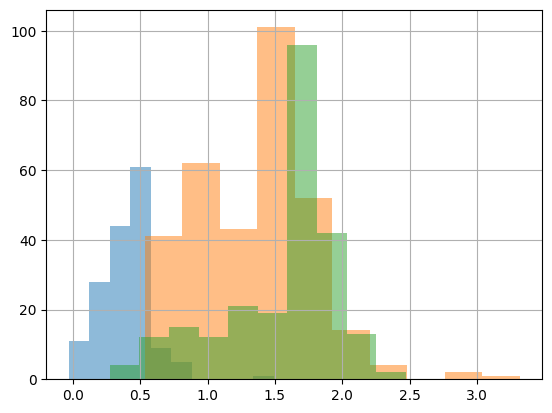

In [21]:
# make histo plot for each class (Rohit, 2014)
squamous['feature_1'].hist(alpha=0.5)
ndbe['feature_1'].hist(alpha=0.5)
neoplasia['feature_1'].hist(alpha=0.5)
